<a href="https://colab.research.google.com/github/iyan-coder/EDA-and-Model-Trainer-3/blob/main/Flight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✈️ Flight Fare Prediction

This is an end-to-end Machine Learning project focused on predicting flight ticket prices based on historical flight data.

---

## 🧩 Problem Statement

Flight ticket prices vary significantly depending on several factors such as airline, time of booking, duration, number of stops, and route. For both travelers and airlines, predicting flight prices accurately is crucial for decision-making and dynamic pricing.

---

## 🔍 Key Insight

Flight pricing is not random, it follows patterns influenced by date, time, route, airline, and stopovers. By analyzing historical flight data, we can uncover these patterns and use them to build a predictive model.

---

## ✅ Goal / Solution

The goal is to build a regression model that can accurately predict the price of a flight based on various features such as:

- Airline  
- Date of Journey  
- Source & Destination  
- Duration  
- Total Stops  
- Additional Info

This model can be used to power travel apps, pricing tools, or dashboards for smarter travel planning and forecasting.

---




## Data Information

In [489]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [490]:
train_df = pd.read_excel("Data_Train.xlsx")
test_df = pd.read_excel("Test_set.xlsx")

In [491]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [492]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [493]:
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [494]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


### Infomation of dataset

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


### Checking the shape of dataset

In [496]:
print(f"The number of rows is {df.shape[0]}\nThe number of columns is {df.shape[1]} ")

The number of rows is 13354
The number of columns is 11 


### Checking number of columns and column name

In [497]:
print(f"The number of columns in the dataset is {len(df.columns)}\nThe names of columns is stated below:\n{df.columns}")

The number of columns in the dataset is 11
The names of columns is stated below:
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


### Checking missing values

In [498]:
missing_val = { feature: np.round(df[feature].isnull().mean() * 100, 4)
               for feature in df.columns if df[feature].isnull().sum() > 0
}

Missing_series = pd.Series(missing_val).sort_values(ascending=False)

missing_series = pd.Series(missing_val).sort_values(ascending=True)
print(f"The total number of coulmns which has missing values is {len(missing_val)}")
print("="*60)
print(f"The columns with missing value is stated below:\n{missing_series}")

The total number of coulmns which has missing values is 3
The columns with missing value is stated below:
Route           0.0075
Total_Stops     0.0075
Price          20.0015
dtype: float64


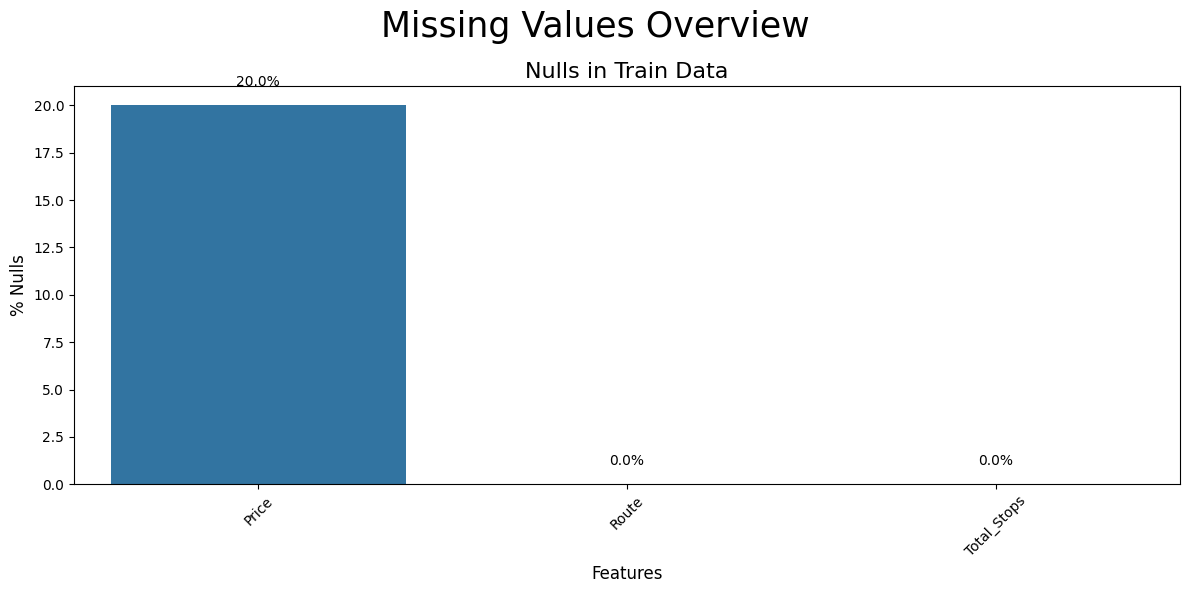

In [499]:
def plot_nulls_short(train):
    fig, ax = plt.subplots(figsize=(12, 6))  # removed list/loop since only one axis

    null_percent = train.isnull().mean() * 100
    null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
    sns.barplot(x=null_percent.index, y=null_percent.values, ax=ax)
    ax.set_title('Nulls in Train Data', fontsize=16)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('% Nulls', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    for i, val in enumerate(null_percent.values):
        ax.text(i, val + 1, f'{val:.1f}%', ha='center')

    plt.suptitle('Missing Values Overview', fontsize=25)
    plt.tight_layout()
    plt.show()

# Run it
plot_nulls_short(df)

### Checking duplicate

In [500]:
print(f"There are {df.duplicated().sum()} duplicate in the dataset")

There are 246 duplicate in the dataset


### Checking Imbalance dataset

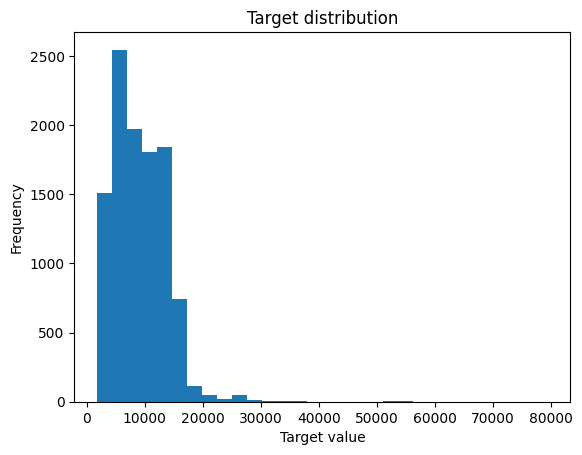

Counts per bin:
 target_bin
(1681.247, 17309.6]    10419
(17309.6, 32860.2]       248
(32860.2, 48410.8]         8
(48410.8, 63961.4]         7
(63961.4, 79512.0]         1
Name: count, dtype: int64

Proportions per bin:
 target_bin
(1681.247, 17309.6]    0.975288
(17309.6, 32860.2]     0.023214
(32860.2, 48410.8]     0.000749
(48410.8, 63961.4]     0.000655
(63961.4, 79512.0]     0.000094
Name: count, dtype: float64

Skewness: 1.8125523782189141
count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


In [501]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Histogram
plt.hist(df['Price'], bins=30)
plt.xlabel('Target value')
plt.ylabel('Frequency')
plt.title('Target distribution')
plt.show()

# 2. Binning + counts
df['target_bin'] = pd.cut(df['Price'], bins=5)
counts = df['target_bin'].value_counts().sort_index()
print("Counts per bin:\n", counts)
print("\nProportions per bin:\n", counts / counts.sum())

# 3. Skewness & summary
print("\nSkewness:", df['Price'].skew())
print(df['Price'].describe())


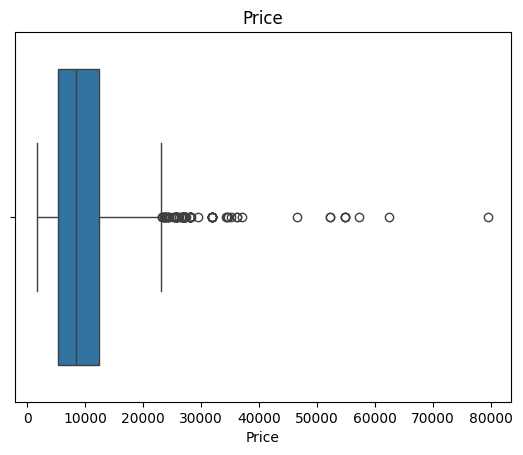

In [502]:
sns.boxplot(x=df["Price"])
plt.title("Price")
plt.show()

In [503]:
Q3 = df["Price"].quantile(0.75)
Q1 = df["Price"].quantile(0.25)

IQR = Q3 - Q1
lower =  Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Price"] < lower) | (df["Price"] > upper)]
print(f"Price: {len(outliers)} outliers")

Price: 94 outliers


**With the analysis on Target `(Price)`:**
* Target has outliers and sweked

### Statistical Information

In [504]:
df.describe().T.sort_values(by= "std",ascending= False)


,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


### Checking Datatype

In [505]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [506]:
for cols in df.columns:
  print(f"Uniques Values: {cols} has {df[cols].nunique()}")
  print(df[cols].unique())
  print("=" * 60)

Uniques Values: Airline has 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Uniques Values: Date_of_Journey has 44
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Uniques Values: Source has 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Uniques Values: Destination has 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hydera

* The above steps give infomation about dataset and how data cleaning and feature enginering should be handle

## Data Cleaning

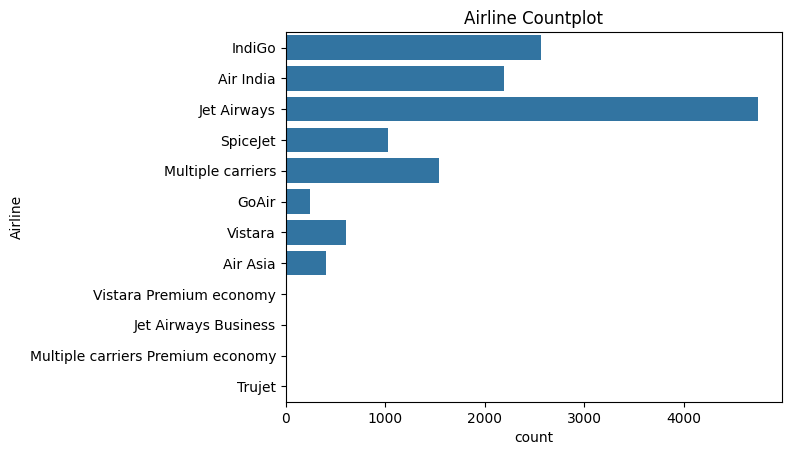

In [507]:
sns.countplot(df["Airline"])
plt.title("Airline Countplot");

In [508]:
airline_counts = df["Airline"].value_counts(normalize=True)
airline_counts

,proportion
Airline,
Jet Airways,0.355399
IndiGo,0.192002
Air India,0.164146
Multiple carriers,0.115546
SpiceJet,0.076831
Vistara,0.045529
Air Asia,0.030328
GoAir,0.017972
Multiple carriers Premium economy,0.001198


In [509]:
airline_freq = df['Airline'].value_counts(normalize=True)
threshold = 0.002
rare_mask = airline_freq < threshold

rare_label = airline_freq[rare_mask].index
print(f"Rare label {list(rare_label)}")


Rare label ['Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy', 'Trujet']


In [510]:
df["Date_of_Journey"][0]

'24/03/2019'

In [511]:
df["Day"] = df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["Month"] = df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["Year"] = df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [512]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [513]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,target_bin,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,"(1681.247, 17309.6]",24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,"(1681.247, 17309.6]",1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,"(1681.247, 17309.6]",9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,"(1681.247, 17309.6]",12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,"(1681.247, 17309.6]",1,3,2019


In [514]:
df["Duration"][0]

'2h 50m'

In [515]:
df["duration_in_hours"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df["duration_in_mins"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [516]:
df[df['duration_in_hours'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,target_bin,Day,Month,Year,duration_in_hours,duration_in_mins
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327.0,"(17309.6, 32860.2]",6,3,2019,5m,NaN
13343,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,NaN,NaN,12,3,2019,5m,NaN


In [517]:
df.drop(6474, axis=0, inplace=True)
df.drop(13343, axis=0, inplace=True)

In [518]:
df['duration_in_hours'] = df['duration_in_hours'].astype(int)


In [519]:
df['duration_in_mins'].isnull().sum()

np.int64(1284)

In [520]:
df['duration_in_mins'] = pd.to_numeric(df['duration_in_mins'], errors='coerce')

In [521]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [522]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,target_bin,Day,Month,Year,duration_in_hours,duration_in_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,"(1681.247, 17309.6]",24,3,2019,2,50.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,"(1681.247, 17309.6]",1,5,2019,7,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,"(1681.247, 17309.6]",9,6,2019,19,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,"(1681.247, 17309.6]",12,5,2019,5,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,"(1681.247, 17309.6]",1,3,2019,4,45.0


In [523]:
df.drop(["Duration","target_bin" ], axis= 1, inplace=True)

In [524]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,duration_in_hours,duration_in_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897.0,24,3,2019,2,50.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662.0,1,5,2019,7,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882.0,9,6,2019,19,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218.0,12,5,2019,5,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302.0,1,3,2019,4,45.0


In [525]:
df["Arrival_Time"][0]

'01:10 22 Mar'

In [526]:
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]

In [527]:
df['Arrival_Time']

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
13349,20:25
13350,16:55
13351,04:25
13352,19:15


In [528]:
df['arrival_hour'] = df['Arrival_Time'].str.split(":").str[0].astype(int)
df['arrival_min'] = df["Arrival_Time"].str.split(":").str[1].astype(int)

In [529]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Total_Stops,object
Additional_Info,object
Price,float64


In [530]:
df.drop(["Arrival_Time"], axis= 1, inplace=True)

In [531]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,duration_in_hours,duration_in_mins,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897.0,24,3,2019,2,50.0,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662.0,1,5,2019,7,25.0,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882.0,9,6,2019,19,NaN,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218.0,12,5,2019,5,25.0,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302.0,1,3,2019,4,45.0,21,35


In [532]:
df["Dep_Time"][0]

'22:20'

In [533]:
df["dep_hour"] = df["Dep_Time"].str.split(":").str[0].astype(int)
df["dep_min"] = df["Dep_Time"].str.split(":").str[1].astype(int)

In [534]:
df.drop(["Date_of_Journey","Route","Dep_Time"], axis=1, inplace=True)

In [535]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,object
Additional_Info,object
Price,float64
Day,int64
Month,int64
Year,int64
duration_in_hours,int64


In [536]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,duration_in_hours,duration_in_mins,arrival_hour,arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,2019,2,50.0,1,10,22,20
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,7,25.0,13,15,5,50
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,19,NaN,4,25,9,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,5,25.0,23,30,18,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,2019,4,45.0,21,35,16,50


### Feature Engineering

#### Handling Duplicate

In [537]:
df.duplicated().sum()

np.int64(249)

In [538]:
df.drop_duplicates(inplace=True)

In [539]:
df.shape

(13103, 15)

#### Handling missing columns

In [540]:
missing_val = { feature: np.round(df[feature].isnull().mean() * 100, 4)
               for feature in df.columns if df[feature].isnull().sum() > 0
}

Missing_series = pd.Series(missing_val).sort_values(ascending=False)

missing_series = pd.Series(missing_val).sort_values(ascending=True)
print(f"The total number of coulmns which has missing values is {len(missing_val)}")
print("="*60)
print(f"The columns with missing value is stated below:\n{missing_series}")

The total number of coulmns which has missing values is 3
The columns with missing value is stated below:
Total_Stops          0.0076
duration_in_mins     9.5856
Price               20.1710
dtype: float64


In [541]:
df['Total_Stops'].head()

,Total_Stops
0,non-stop
1,2 stops
2,2 stops
3,1 stop
4,1 stop


In [542]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode().iloc[0])
df['duration_in_mins'] = df['duration_in_mins'].fillna(df['duration_in_mins'].median()).astype(int)
df['Price'] = df['Price'].fillna(df['Price'].median())

In [543]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Price,0
Day,0
Month,0
Year,0
duration_in_hours,0


In [544]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,object
Additional_Info,object
Price,float64
Day,int64
Month,int64
Year,int64
duration_in_hours,int64


In [545]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [546]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0 , '2 stops':2 , '1 stop':1, '3 stops':3, '4 stops':4})

In [547]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [548]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [549]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Year', 'duration_in_hours',
       'duration_in_mins', 'arrival_hour', 'arrival_min', 'dep_hour',
       'dep_min'],
      dtype='object')

In [550]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Define columns
cat_col = ['Airline', 'Source', 'Destination', 'Additional_Info']

num_col = ['Total_Stops', 'Day', 'Month', 'Year', 'duration_in_hours',
           'duration_in_mins', 'arrival_hour', 'arrival_min', 'dep_hour', 'dep_min']

# Build the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_col),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True, drop='first'), cat_col)
])


In [551]:
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['Total_Stops', 'Day', 'Month', 'Year',
                                  'duration_in_hours', 'duration_in_mins',
                                  'arrival_hour', 'arrival_min', 'dep_hour',
                                  'dep_min']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Airline', 'Source', 'Destination',
                                  'Additional_Info'])])

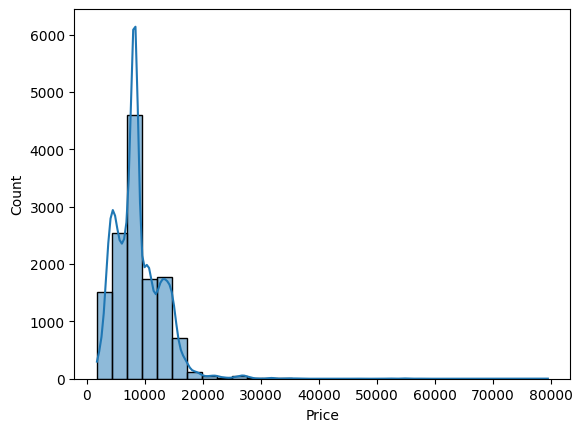

In [552]:
sns.histplot(data = df['Price'], bins=30,kde=True);

In [553]:
df['Price_log'] = np.log1p(df['Price'])

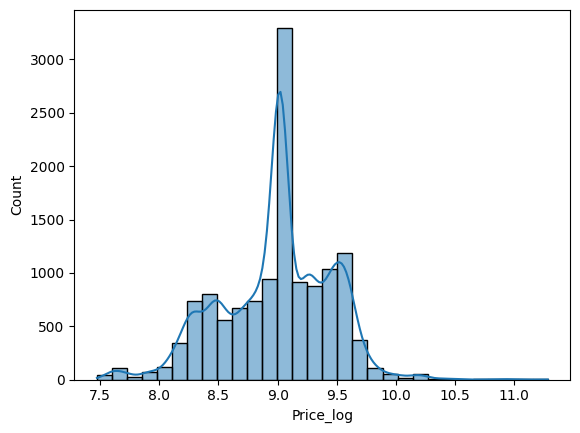

In [554]:
sns.histplot(data = df['Price_log'], bins=30,kde=True);

In [555]:
X = df.drop(['Price','Price_log'],axis=1)
y = df['Price_log']

In [556]:
X,y

(                 Airline    Source Destination  Total_Stops Additional_Info  \
 0                 IndiGo  Banglore   New Delhi            0         No info   
 1              Air India   Kolkata    Banglore            2         No info   
 2            Jet Airways     Delhi      Cochin            2         No info   
 3                 IndiGo   Kolkata    Banglore            1         No info   
 4                 IndiGo  Banglore   New Delhi            1         No info   
 ...                  ...       ...         ...          ...             ...   
 13349          Air India   Kolkata    Banglore            1         No info   
 13350             IndiGo   Kolkata    Banglore            0         No info   
 13351        Jet Airways     Delhi      Cochin            1         No info   
 13352          Air India     Delhi      Cochin            1         No info   
 13353  Multiple carriers     Delhi      Cochin            1         No info   
 
        Day  Month  Year  duration_in_

In [557]:
df['Price_log'].max()

11.283675809286734

In [558]:
X_scaler = preprocessor.fit_transform(X)

In [559]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaler,y, random_state =4, test_size=0.20)

In [560]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10482, 39), (2621, 39), (10482,), (2621,))

### Building Model

In [561]:
import tensorflow as tf
import random
# Creating a model
# Setting seed
tf.random.set_seed(42)

# Build the model

model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu' ),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # For regression

])
# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

# Fit the model
history_1 = model.fit(X_train,
                      y_train,
                      epochs = 100)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7185 - mae: 2.7185
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2579 - mae: 0.2579
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2305 - mae: 0.2305
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2203 - mae: 0.2203
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2159 - mae: 0.2159
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2084 - mae: 0.2084
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2058 - mae: 0.2058
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2049 - mae: 0.2049
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2066 - mae: 0.2066
Epoch 10/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1991 - mae: 0.1991
Epoch 11/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2028 - mae: 0.2028
Epoch 12/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1981 - mae: 0.1981
Epoch 13/100


In [562]:
model_1 = model.evaluate(X_test,y_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1976 - mae: 0.1976


In [563]:
import numpy as np
real_mae = np.expm1(0.1940)
print(real_mae)

0.2140962829562331


In [564]:
(0.2082/11.283675809286734) * 100

1.8451434046753312

In [565]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.6398460081326416

<Axes: >

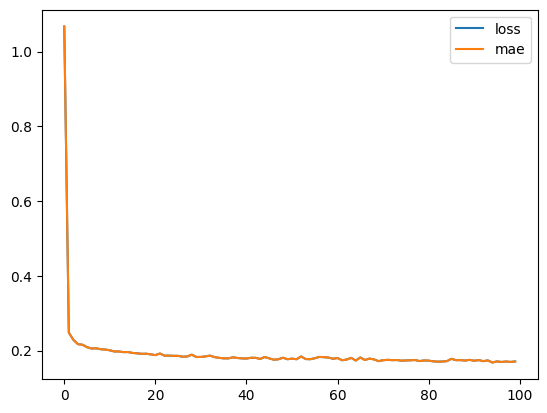

In [566]:
pd.DataFrame(history_1.history).plot()

In [570]:
### Create a Fuction to Evalute Model
def evaluate_model(true, predicted):
          mae = mean_absolute_error(true, predicted)
          mse = mean_squared_error(true, predicted)
          rmse = np.sqrt(mean_squared_error(true, predicted))
          r2_square  = r2_score(true, predicted)
          return mae,rmse, r2_square

In [571]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [572]:
models  = {
          "Linear Regression": LinearRegression(),
          "Lasso": Lasso(),
          "Ridge": Ridge(),
          "k-Neighbors Regressor": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest Regressor": RandomForestRegressor(),
          "Adaboost Regressor": AdaBoostRegressor(),
          "Gradient Regressor": GradientBoostingRegressor(),
          "XGB Regressor": XGBRegressor()
}


for i in range (len(list(models))):
          model = list(models.values())[i]
          model.fit(X_train , y_train)  # Train model


          # Make Prediction
          y_train_pred  = model.predict(X_train)
          y_test_pred = model.predict(X_test)

          ## Evaluate Train and test dataset
          model_train_mae, model_train_rmse, model_train_r2_square = evaluate_model(y_train, y_train_pred)

          model_test_mae, model_test_rmse, model_test_r2_square = evaluate_model(y_test, y_test_pred)


          print(list(models.keys())[i])

          print('Model performance for Training set')
          print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
          print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
          print('- R2 Score: {:.4f}'.format(model_train_r2_square))



          print('--------------------------------')

          print('Model performance for Test set')
          print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
          print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
          print('- R2 Score: {:.4f}'.format(model_test_r2_square))



          print('='*35)
          print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2859
- Mean Absolute Error: 0.2259
- R2 Score: 0.6129
--------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2909
- Mean Absolute Error: 0.2280
- R2 Score: 0.6049


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4595
- Mean Absolute Error: 0.3505
- R2 Score: 0.0000
--------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4628
- Mean Absolute Error: 0.3512
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2860
- Mean Absolute Error: 0.2261
- R2 Score: 0.6126
--------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2905
- Mean Absolute Error: 0.2282
- R2 Score: 0.6058


k-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2173
- Mean Absolute Error: 0.1534
- R2 Score: 0.7764
----------------------------